  # Multiclass Classification with KNN

In [30]:
# import modules for preprocessing 
import os
import skimage
from skimage import data
from skimage import io
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,accuracy_score
import natsort





## Preprocess the data

### Function image_to_vec() will:
####  - Read in the image file names in the directory and sort them in ascending order.
####  - Add the directory path to each image name, so all images can be found.
#### - Find the images using the paths.
#### - Read in the images as grayscale
#### - Convert the images into arrays
#### - Return a list of image arrays and a list of each file name.

In [31]:
#imagefile_list = os.listdir('dataset/sample_images/') # dataset of 200
#directory = 'dataset/sample_images/'

imagefile_list = os.listdir('test/image/') # test dataset of 200
directory = 'test/image/'




# Function to take image files in dir, convert them into vectors and save them to a list

def image_to_vec(file_list, directory):    
    vec_list = []
    files = []
    for filename in file_list:
        if filename.endswith('.jpg'):
            files.append(filename)
    files = natsort.natsorted(files) # sort file names in ascending order
    #print(files)
    for file in files:
      image_path = directory+file
      #print(image_path)
      image = np.array(imread(image_path, as_gray=True)) #read in as grayscale
      vec_list.append(image)

    return vec_list,files 
   

### 1. Assign a number to each tumour type by adding them in an extra column in the labels file.

0. no_tumor
1. glioma_tumor
2. meningioma_tumor
3. pituitary_tumor


For this, a script is needed to read in labels from the csv file and add a column with the respective number label.

In [38]:
# Loading the csv file
#tumors = pd.read_csv('./dataset/sample_labels_updated.csv', sep=',') # class labels

tumors = pd.read_csv('test/label.csv', sep=',') # class labels
print(tumors)
                            

          file_name             label  label2
0    IMAGE_0000.jpg  meningioma_tumor       2
1    IMAGE_0001.jpg  meningioma_tumor       2
2    IMAGE_0002.jpg      glioma_tumor       1
3    IMAGE_0003.jpg   pituitary_tumor       3
4    IMAGE_0004.jpg      glioma_tumor       1
..              ...               ...     ...
195  IMAGE_0195.jpg   pituitary_tumor       3
196  IMAGE_0196.jpg          no_tumor       0
197  IMAGE_0197.jpg  meningioma_tumor       2
198  IMAGE_0198.jpg          no_tumor       0
199  IMAGE_0199.jpg      glioma_tumor       1

[200 rows x 3 columns]


#### 2. Split the file names and label data into their own lists. Run the file names and labels through the function that will find the images in the directory, and convert them into an array.

0      2
1      2
2      1
3      3
4      1
      ..
195    3
196    0
197    2
198    0
199    1
Name: label2, Length: 200, dtype: int64


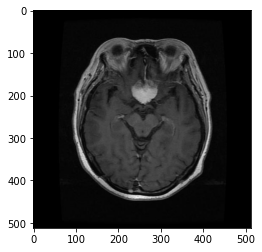

In [33]:

# Split the data
im_files = list(tumors['file_name']) # converting to list in order to access each filename
labels = tumors['label2']
print(labels)

im_vecs,filenames = image_to_vec(im_files,directory) 

plt.imshow(im_vecs[0], cmap='gray') #check that im_vecs has image vectors in correct order



#### 3. Merge the image and label data.

In [34]:


data = list(zip(im_vecs,labels)) # join the image vectors and their respective labels
data[0] # output should show that each array is paired with its label
#print('data type',type(data))
#print('first vector',data[0][0])
#print('first label', data[0][1])



(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 2)

#### 4. Convert the image and label data into arrays X and Y.

In [35]:
# Loading the data file: 

def list_to_array(list_of_tuples): # Convert the data from list type to array
    X=[]
    Y=[]
    count=0
    for pair in list_of_tuples:
        temp=pair[0]
        temp2=pair[1]
        X.append(temp)
        Y.append(temp2)
        count+=1
        #print(count,'tuples converted to array') # check if function is running
    X=np.asarray(X)
    Y=np.asarray(Y)
    
    return X,Y

X,Y=list_to_array(data)
X=X.reshape(200,262144) # MAKE SURE THIS MATCHES COUNT OF DATA SAMPLES
print('x shape',X.shape)
print('y shape',Y.shape[0])



# Shuffle and split the data into training and test set
X, Y = shuffle(X,Y)
print('x shape',X.shape, 'y shape',Y.shape)
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=0)
print('x_train shape',x_train.shape,'y_train shape',y_train.shape)
print('x_test shape',x_test.shape,'y_test shape',y_test.shape)




x shape (200, 262144)
y shape 200
x shape (200, 262144) y shape (200,)
x_train shape (140, 262144) y_train shape (140,)
x_test shape (60, 262144) y_test shape (60,)


## Run data through KNN model

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [37]:

def knn_classify(x_train, y_train, x_test, y_test, k):
    
    all_scores = []
    q = 10*k
    
    while k<(2*q):
        #Create KNN object with a K coefficient
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train, y_train) # Fit KNN model
        y_pred = knn.predict(x_test)
        #print('y_pred',y_pred)
        score=metrics.accuracy_score(y_test,y_pred)
        #print(score)
        score_and_k=[score,k]
        all_scores.append(score_and_k)
        #print(k)
        k+=1
    all_scores = natsort.natsorted(all_scores) # ascending order
    
    # access the highest score by finding the last index
    # then access its value of k
    best_k = all_scores[-1][1] 
    score = all_scores[-1][0]
    #print('best k',best_k, 'best k type',type(best_k))
    knn = KNeighborsClassifier(n_neighbors=best_k)
    knn.fit(x_train, y_train) # Fit KNN model
    y_pred = knn.predict(x_test)  
     
    return y_pred,score


Y_pred,score=knn_classify(x_train, y_train, x_test,y_test, 1)
print('Accuracy score',score)


#score=metrics.accuracy_score(y_test,Y_pred)
#print(score)
print(classification_report(y_test,Y_pred))




Accuracy score 0.6
              precision    recall  f1-score   support

           0       0.64      0.75      0.69        12
           1       0.64      0.60      0.62        15
           2       0.67      0.32      0.43        19
           3       0.52      0.86      0.65        14

    accuracy                           0.60        60
   macro avg       0.62      0.63      0.60        60
weighted avg       0.62      0.60      0.58        60

